# Dependencies

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib as mlt
import geopandas as gpd
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import plotly
import altair as alt
import bokeh as bok

# Importing Datasets

In [7]:
file_path1 = 'Dataset/File1.csv'
file_path2 = 'Dataset/File2.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_20008\3471375018.py:4: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path1)
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_20008\3471375018.py:5: DtypeWarning: Columns (79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(file_path2)


# Pre-processing

In [8]:
combined_data = pd.concat([data1, data2], ignore_index=True)

# Dataset Overview

In [6]:
#Column names
for col in combined_data.columns:
    print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

# Analysis

#### Attacks Over Time

In [38]:
# Plot points over time worldwide, animation, Bar graph and countries plot
# Number of Causalities overlapping

# Load world map data from Geopandas


# Assuming you have a GeoDataFrame named 'world' containing world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'combined_data' contains your dataset with columns like 'year', 'country', 'latitude', 'longitude'
# Filter the data for each year and plot points on the world map for that year
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the function for the animation
def animate(year):
    plt.cla()  # Clear axis for new plot
    
    year_data = combined_data[combined_data['iyear'] == year]  # Filter data for the current year
    
    # Create a GeoDataFrame for the points of the current year
    gdf = gpd.GeoDataFrame(year_data, geometry=gpd.points_from_xy(year_data.longitude, year_data.latitude))
    
    world.boundary.plot(ax=ax, linewidth=0.5)  # Plot world boundaries
    
    # Plot points for the current year
    gdf.plot(ax=ax, color='red', markersize=5, marker='x', label=str(year), alpha=0.6)
    
    # Set title and legend
    plt.title(f'Attacks around the world ({year})')
    # plt.legend([f'Year {year}'], loc='upper left')

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=range(1970, 2023), interval=1000)
ani.save('AttacksWorldwide.mp4', writer='ffmpeg', fps=2)  # Save the animation as an MP4 video
plt.close()



C:\Users\Cr7th\AppData\Local\Temp\ipykernel_6600\4051714465.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_6600\4051714465.py:26: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.plot(ax=ax, color='red', markersize=5, marker='x', label=str(year), alpha=0.6)
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_6600\4051714465.py:26: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.plot(ax=ax, color='red', markersize=5, marker='x', label=str(year), alpha=0.6)


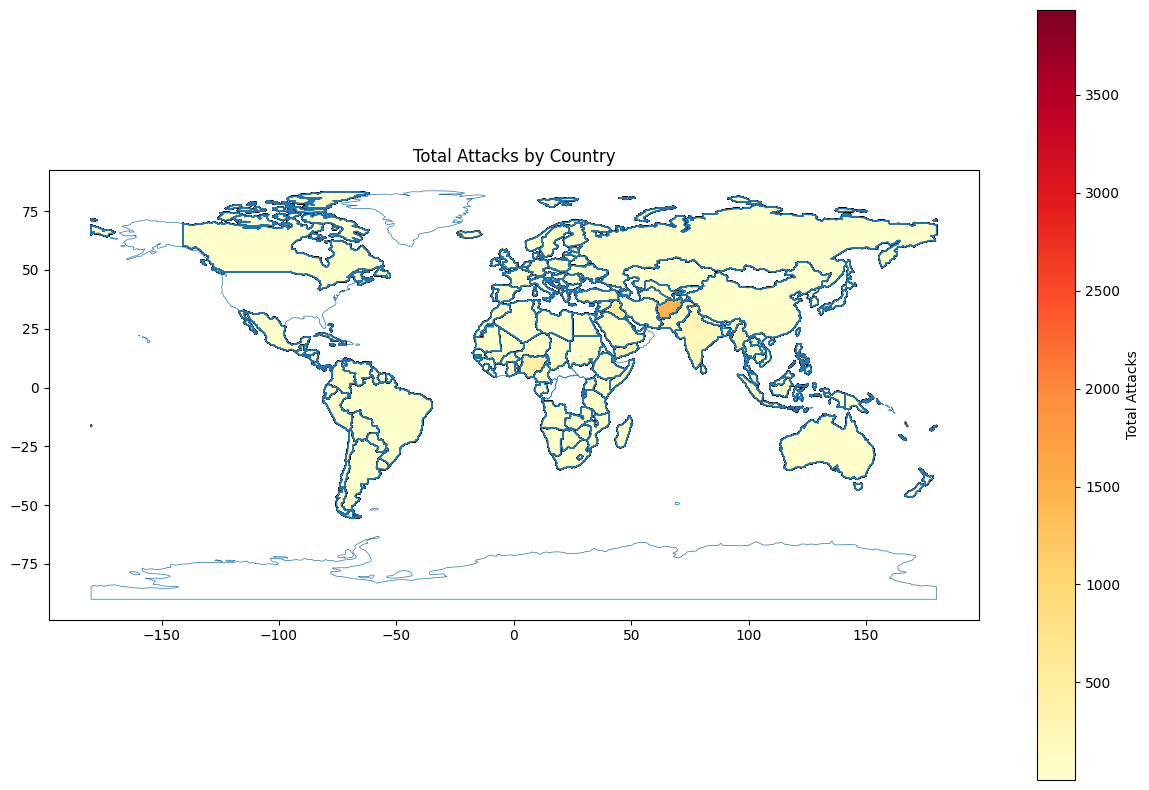

In [8]:
attacks_by_country_year = combined_data.groupby(['country_txt', 'iyear']).size().reset_index(name='attack_count')


# Merge world map data with attack count data
world = world.merge(attacks_by_country_year, how='left', left_on='name', right_on='country_txt')

# Plotting the world map with attack counts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5)  # Plot world boundaries

# Plot total attacks by country (use 'attack_count' column)
world.plot(column='attack_count', ax=ax, legend=True,
           legend_kwds={'label': "Total Attacks", 'orientation': "vertical"},
           cmap='YlOrRd', edgecolor='black')  # Choose colormap and edgecolor

plt.title('Total Attacks by Country')
plt.show()


#### Attacks By Country

     country_txt  attack_count
0    Afghanistan         20373
1        Albania            83
2        Algeria          2754
3        Andorra             1
4         Angola           501
..           ...           ...
199        Yemen          6317
200   Yugoslavia           203
201        Zaire            50
202       Zambia            63
203     Zimbabwe           106

[204 rows x 2 columns]


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_6600\3511372458.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  # Assuming world map data


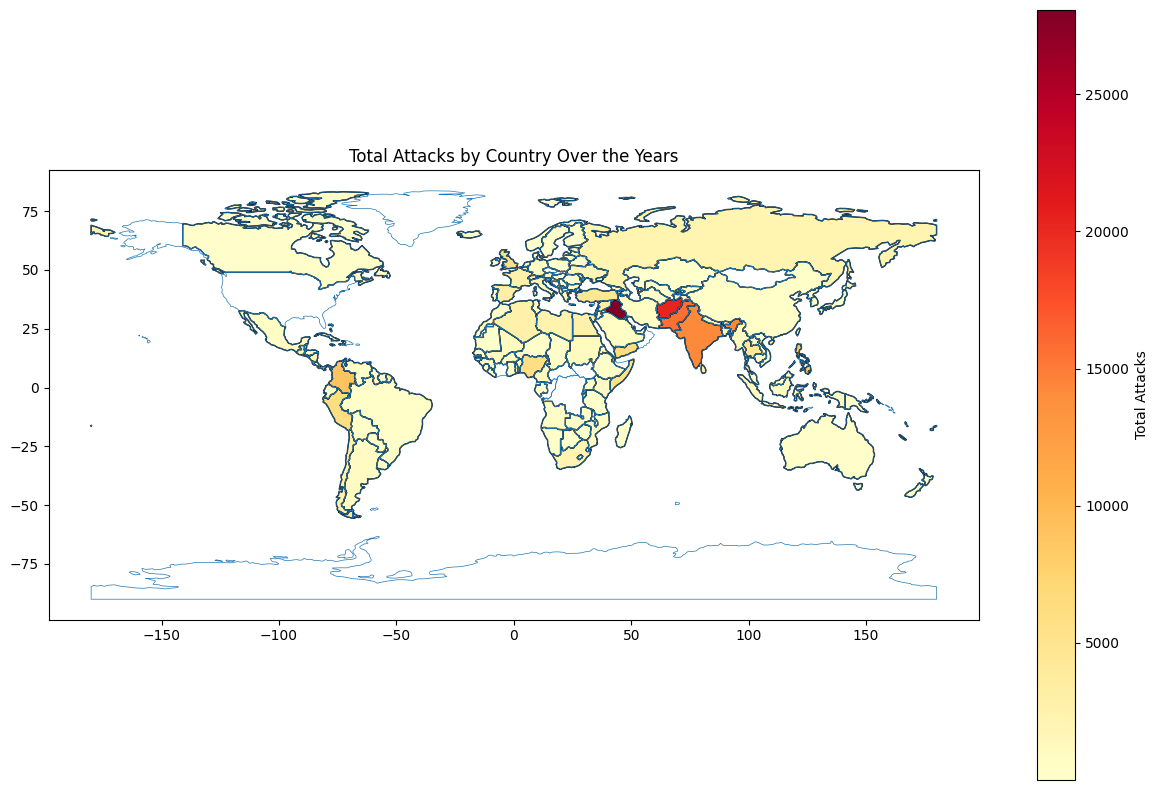

In [26]:
# Group by number of attacks
# Grouping data by 'country' and counting the number of attacks

# Assuming 'world' is a GeoDataFrame with world map data
# Assuming 'attacks_by_country' is a DataFrame with columns 'country' and 'attack_count'

grouped_data = combined_data.groupby(['iyear', 'country_txt']).size().reset_index(name='attack_count')

# Create an empty dictionary to store the attack information
attacks_dict = {}

# Iterate through each row in the grouped data
for index, row in grouped_data.iterrows():
    year = row['iyear']
    country = row['country_txt']
    count = row['attack_count']
    
    # Check if the year exists in the dictionary
    if year not in attacks_dict:
        attacks_dict[year] = {}
    
    # Add country to the dictionary for the specific year
    if country in attacks_dict[year]:
        attacks_dict[year][country] += count
    else:
        attacks_dict[year][country] = count

# Print the generated dictionary
total_attacks_by_country = grouped_data.groupby('country_txt')['attack_count'].sum().reset_index()

# Printing the total attacks by country
print(total_attacks_by_country)

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))  # Assuming world map data
world = world.merge(total_attacks_by_country, how='left', left_on='name', right_on='country_txt')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5)  # Plot world boundaries

# Plot total attacks by country (use 'attack_count' column)
world.plot(column='attack_count', ax=ax, legend=True,
           legend_kwds={'label': "Total Attacks", 'orientation': "vertical"},
           cmap='YlOrRd', edgecolor='black')  # Choose colormap and edgecolor

plt.title('Total Attacks by Country Over the Years')
plt.show()


############### Make interactive map

# usa_attacks = total_attacks_by_country[total_attacks_by_country['country_txt'] == 'United States']

# # Display the total number of attacks in the United States
# print("Total attacks in the United States:", usa_attacks['attack_count'].values[0])

#### Major Terrorist Groups (Change position?)

Unique Group Names and Occurrences (>= 1000 attacks excluding 'Unknown'):
gname
Taliban                                             12936
Islamic State of Iraq and the Levant (ISIL)          7479
Shining Path (SL)                                    4567
Al-Shabaab                                           4547
Houthi extremists (Ansar Allah)                      3516
Boko Haram                                           3459
New People's Army (NPA)                              3441
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2670
Kurdistan Workers' Party (PKK)                       2612
Revolutionary Armed Forces of Colombia (FARC)        2490
Maoists                                              2164
Communist Party of India - Maoist (CPI-Maoist)       2113
Basque Fatherland and Freedom (ETA)                  2024
National Liberation Army of Colombia (ELN)           1842
Liberation Tigers of Tamil Eelam (LTTE)           

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_20008\1789997010.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


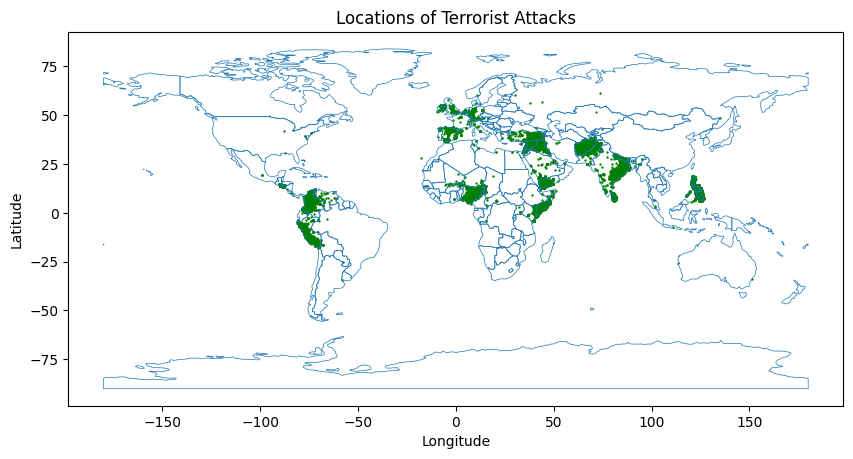

In [19]:
# Find unique group names ('gname') and their occurrences
group_name_counts = combined_data['gname'].value_counts()

# Filter groups with less than 1000 attacks and exclude "Unknown"
filtered_groups = group_name_counts[(group_name_counts >= 1000) & (group_name_counts.index != 'Unknown')]

# Display the filtered group names and their occurrence counts
print("Unique Group Names and Occurrences (>= 1000 attacks excluding 'Unknown'):")
print(filtered_groups)

# Filter the data for groups with >= 1000 attacks and exclude "Unknown"
filtered_data = combined_data[(combined_data['gname'].isin(filtered_groups.index)) & (combined_data['gname'] != 'Unknown')]

# Assuming 'world' is a GeoDataFrame representing world map data
# Replace 'world' with your GeoDataFrame containing world map data
# Load the world map data using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame for the filtered attacks using latitude and longitude
geometry = gpd.points_from_xy(filtered_data['longitude'], filtered_data['latitude'])
geo_filtered_attacks = gpd.GeoDataFrame(filtered_data, geometry=geometry)

# Plotting the world map and filtered attacks
fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=0.5)
geo_filtered_attacks.plot(ax=ax, marker='o', color='green', markersize=0.5)

plt.title('Locations of Terrorist Attacks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Top 5 terrorist group and their attacks (Map) [Card of info] (Separate)

gname
Taliban                                        12936
Islamic State of Iraq and the Levant (ISIL)     7479
Shining Path (SL)                               4567
Al-Shabaab                                      4547
Houthi extremists (Ansar Allah)                 3516
Name: count, dtype: int64


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_20008\2580236042.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


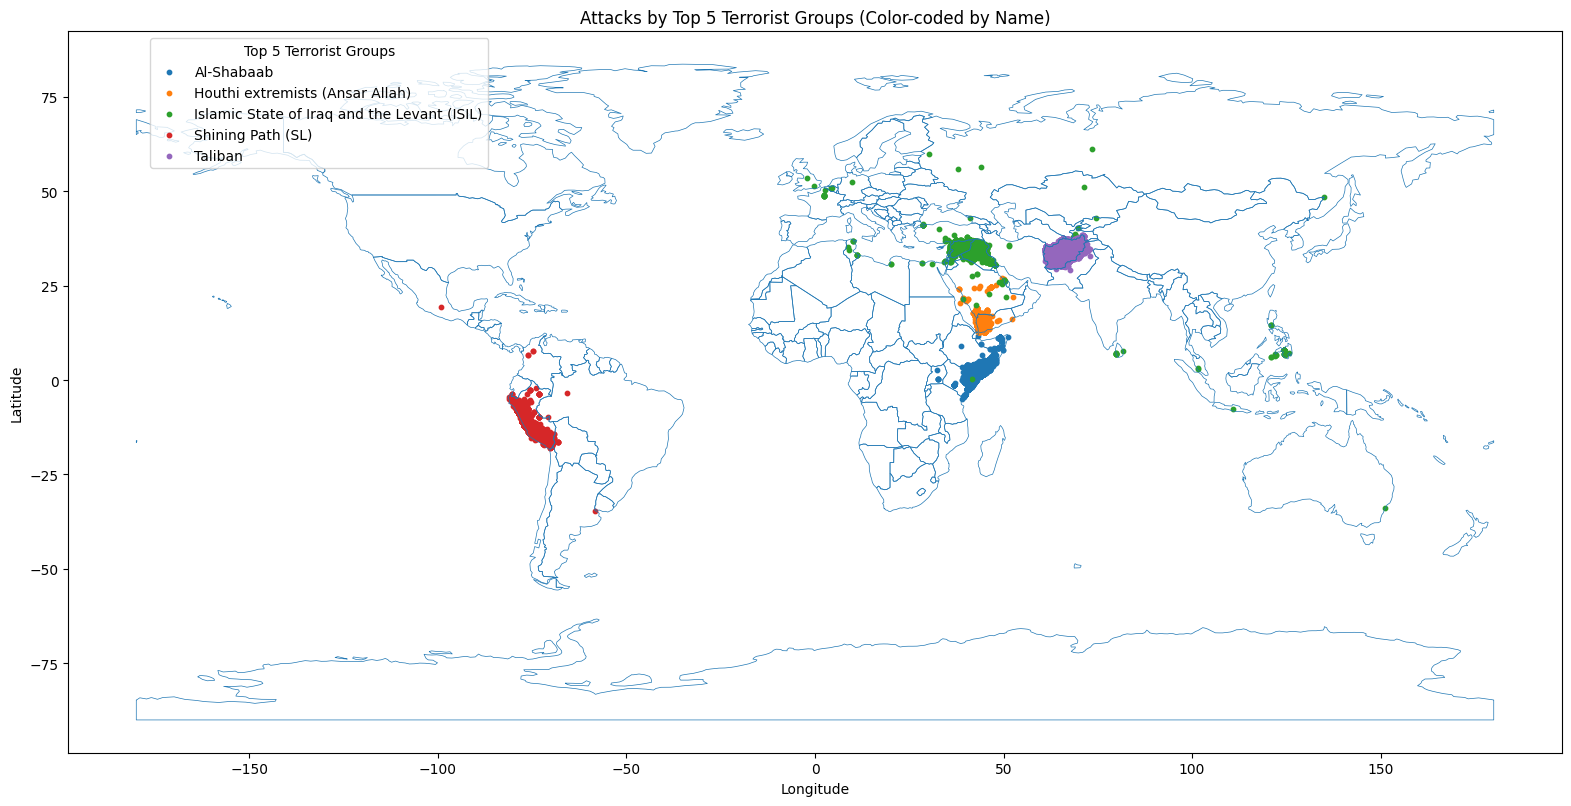

In [27]:
top_groups = group_name_counts[(group_name_counts >= 1000) & (group_name_counts.index != 'Unknown')].head(5)

print(top_groups)


# Filter the data for attacks by the top 5 groups
filtered_data_top_groups = combined_data[combined_data['gname'].isin(top_groups.index)]

# Create a dictionary to store attack locations by group name
attack_locations_by_group = {}

# Populate the dictionary with attack locations for each group
for group, data in filtered_data_top_groups.groupby('gname'):
    attack_locations_by_group[group] = list(zip(data['latitude'], data['longitude']))

# Load world map data using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
fig, ax = plt.subplots(figsize=(16, 8))
world.boundary.plot(ax=ax, linewidth=0.5)

# Plotting attacks color-coded for each group
for group, locations in attack_locations_by_group.items():
    latitudes, longitudes = zip(*locations)
    ax.scatter(longitudes, latitudes, label=group, s=10)

# Display a legend/key for the groups (placing legend outside the plot)
plt.legend(title='Top 5 Terrorist Groups', bbox_to_anchor=(.05, 1), loc='upper left')
plt.title('Attacks by Top 5 Terrorist Groups (Color-coded by Name)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

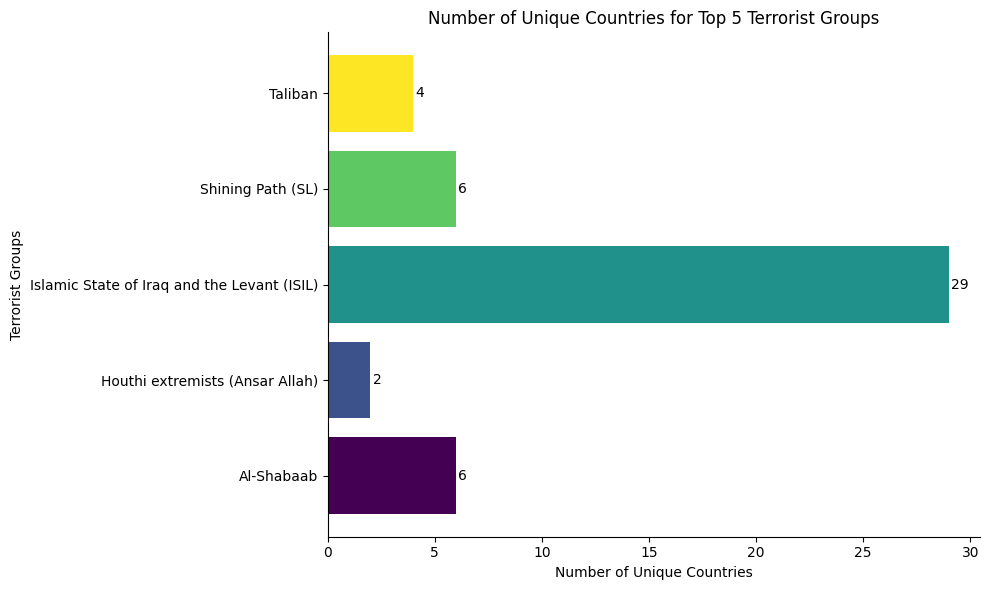

In [37]:

# Filter the data for attacks by the top 5 groups
filtered_data_top_groups = combined_data[combined_data['gname'].isin(top_groups.index)]

# Create a dictionary to store unique countries for each group
unique_countries_by_group = {}

# Populate the dictionary with unique country names for each group
for group, data in filtered_data_top_groups.groupby('gname'):
    unique_countries_by_group[group] = data['country_txt'].unique()


# Extracting group names and corresponding counts
import matplotlib.pyplot as plt

# Assuming 'unique_countries_by_group' contains the dictionary of unique countries for each group

# Extracting group names and corresponding counts
groups = list(unique_countries_by_group.keys())
counts = [len(countries) for countries in unique_countries_by_group.values()]

# Creating a color palette using Matplotlib's colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))  # Use 'viridis' colormap for a gradient of colors

# Plotting the bar plot with enhanced styling
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(groups, counts, color=colors)

# Adding labels and titles
plt.xlabel('Number of Unique Countries')
plt.ylabel('Terrorist Groups')
plt.title('Number of Unique Countries for Top 5 Terrorist Groups')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)  # Remove grid lines
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['top'].set_visible(False)  # Hide top spine

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{counts[i]}', ha='left', va='center')

plt.tight_layout()
plt.show()

#### Location Of Terrorist Groups By Country (Find Better Criteria)


#### Attacks by country (Top 10)

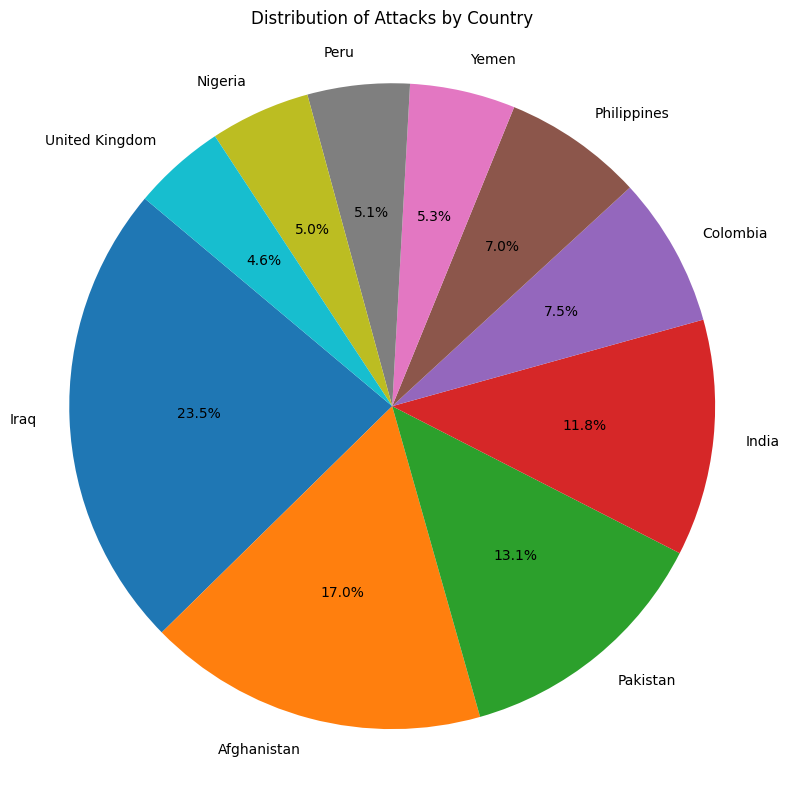

In [41]:
# Assuming you have a DataFrame named 'attacks_by_country' with columns 'country_txt' and 'attack_count'

# Grouping data by 'country_txt' and summing up the attacks count for each country
attacks_by_country = combined_data.groupby('country_txt').size().reset_index(name='attack_count')

# Sorting data by attack count in descending order
attacks_by_country = attacks_by_country.sort_values('attack_count', ascending=False)

# Selecting the top 10 countries
top_countries = attacks_by_country.head(10)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries['attack_count'], labels=top_countries['country_txt'], autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Attacks by Country')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


#### Cities with Most Attacks (Top 10)

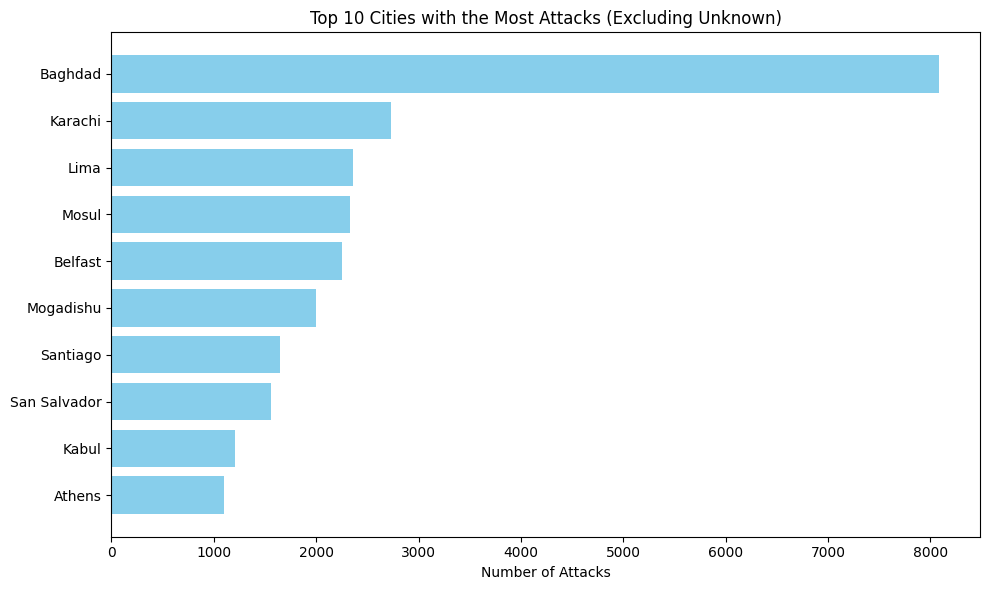

In [49]:

# Filtering out 'Unknown' values from the 'city' column
filtered_data = combined_data[combined_data['city'] != 'Unknown']

# Grouping filtered data by 'city' and counting the occurrences of attacks in each city
attacks_by_city = filtered_data['city'].value_counts().reset_index()
attacks_by_city.columns = ['City', 'Attack Count']

# Selecting the top 10 cities with the most attacks
top_cities_attacks = attacks_by_city.head(10)

# Plotting a bar chart for the top 10 cities
plt.figure(figsize=(10, 6))
plt.barh(top_cities_attacks['City'], top_cities_attacks['Attack Count'], color='skyblue')
plt.xlabel('Number of Attacks')
plt.title('Top 10 Cities with the Most Attacks (Excluding Unknown)')

plt.gca().invert_yaxis()  # Invert y-axis to display the cities with the highest attacks at the top
plt.tight_layout()
plt.show()

#### Cities with Most Deaths (Top 10)

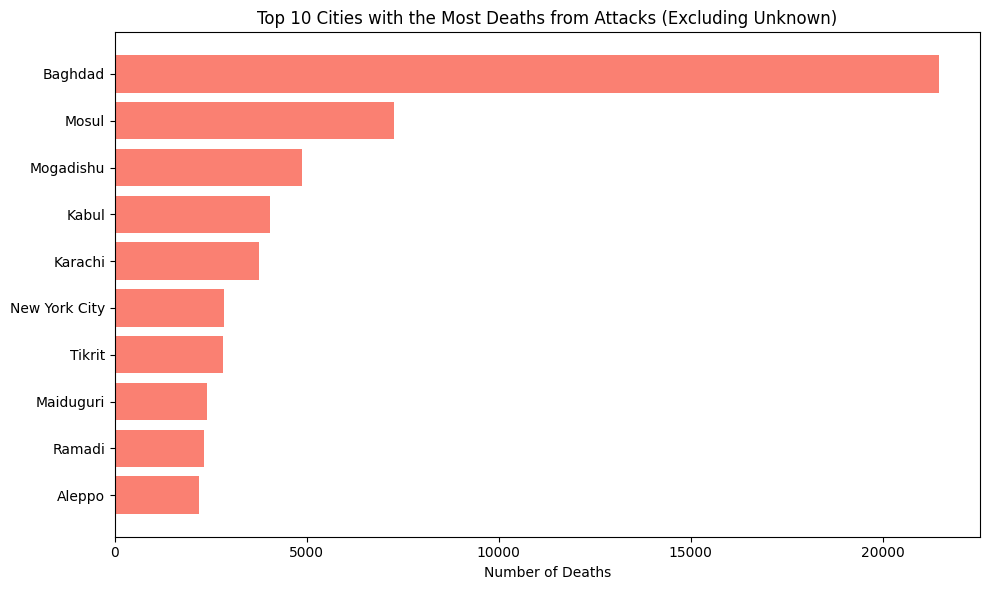

In [50]:

# Assuming you have a DataFrame named 'combined_data' with a column named 'city' indicating city names
# and a column named 'nkill' indicating the number of deaths

# Filtering out 'Unknown' values from the 'city' column
filtered_data = combined_data[combined_data['city'] != 'Unknown']

# Grouping filtered data by 'city' and summing the number of deaths in each city
deaths_by_city = filtered_data.groupby('city')['nkill'].sum().reset_index()

# Sorting the cities based on total deaths
deaths_by_city_sorted = deaths_by_city.sort_values(by='nkill', ascending=False)

# Selecting the top 10 cities with the most deaths
top_cities_deaths = deaths_by_city_sorted.head(10)

# Plotting a bar chart for the top 10 cities with the most deaths
plt.figure(figsize=(10, 6))
plt.barh(top_cities_deaths['city'], top_cities_deaths['nkill'], color='salmon')
plt.xlabel('Number of Deaths')
plt.title('Top 10 Cities with the Most Deaths from Attacks (Excluding Unknown)')

plt.gca().invert_yaxis()  # Invert y-axis to display the cities with the highest deaths at the top
plt.tight_layout()
plt.show()

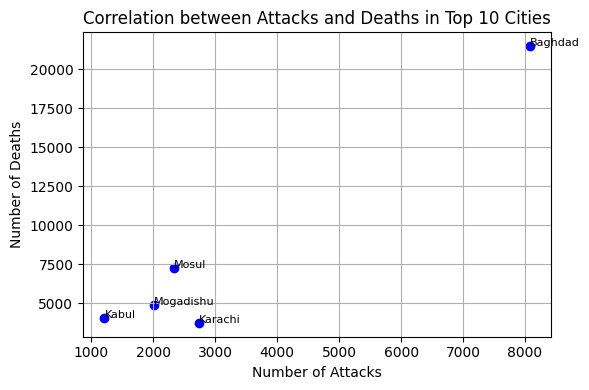

In [64]:
# Merging the top cities with attacks and deaths based on the 'City' and 'city' columns
merged_data = pd.merge(top_cities_attacks, top_cities_deaths, left_on='City', right_on='city', suffixes=('_attacks', '_deaths'))

# Create a scatter plot correlating attacks and deaths for the top cities
plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Attack Count'], merged_data['nkill'], color='blue')

# Add labels and title
plt.xlabel('Number of Attacks')
plt.ylabel('Number of Deaths')
plt.title('Correlation between Attacks and Deaths in Top 10 Cities')

# Annotate the points with city names
for i, city in enumerate(merged_data['City']):
    plt.text(merged_data['Attack Count'][i], merged_data['nkill'][i], city, fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()


#### Types Of Terror Attacks

In [ ]:
# Filter the data to exclude rows with unknown attack types
known_attacks = combined_data[combined_data['attacktype1_txt'] != 'Unknown']

# Get the count of known attack types
known_attack_counts = known_attacks['attacktype1_txt'].value_counts()

# Display the counts of known attack types
print(known_attack_counts)

attacktype1_txt
Bombing/Explosion                      99986
Armed Assault                          50845
Assassination                          21989
Hostage Taking (Kidnapping)            14493
Facility/Infrastructure Attack         12606
Unknown                                11545
Unarmed Assault                         1257
Hostage Taking (Barricade Incident)     1172
Hijacking                                773
Name: count, dtype: int64


In [88]:
event = combined_data['eventid'].unique()

attack_types_by_event = {}

# Loop through unique event IDs
for event_id in combined_data['eventid'].unique():
    # Filter data for the specific event ID
    event_data = combined_data[combined_data['eventid'] == event_id]
    
    # Get attack types for the event and append them to a list
    attack_types = event_data['attacktype1_txt'].unique().tolist()
    attack_types.extend(event_data['attacktype2_txt'].unique().tolist())
    
    # Remove any 'nan' values
    attack_types = [x for x in attack_types if str(x) != 'nan']
    
    # Store attack types in the dictionary with event ID as key
    attack_types_by_event[event_id] = attack_types

# Displaying the dictionary containing attack types for each event ID
print(attack_types_by_event)

#### Types Of Attacks (Continent\country)

## Targets Hit

In [84]:
target_names = combined_data['targtype1_txt'].unique()
target_secondary= combined_data['targsubtype1_txt'].unique()


target_name_counts = combined_data['targtype1_txt'].value_counts()
target_secondary_name_counts = combined_data['targsubtype1_txt'].value_counts()
print(target_names)
print(group_name_counts)
print(target_secondary)
print(target_secondary_name_counts)

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
attacktype1_txt
Bombing/Explosion                      99986
Armed Assault                          50845
Assassination                          21989
Hostage Taking (Kidnapping)            14493
Facility/Infrastructure Attack         12606
Unknown                                11545
Unarmed Assault                         1257
Hostage Taking (Barricade Incident)     1172
Hijacking                                773
Name: count, dtype: int64
['Named Civilian' 'Diplomatic Personnel (outside of embassy, consulate)'
 'Radio Journalist/Staff/Facility' 'Embassy/Consulate'
 'Police B

#### Targets Hit (Military + Police vs Civilians)

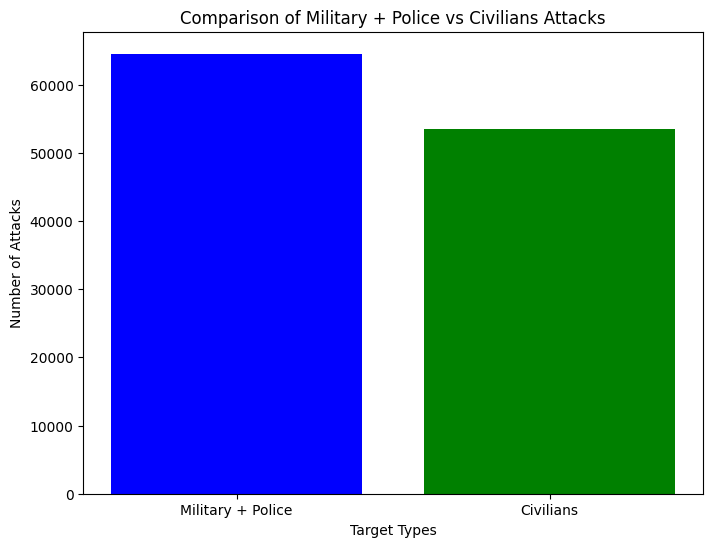

In [85]:

# Filter data for Military + Police and Civilians attacks
military_police_attacks = combined_data[combined_data['targtype1_txt'].isin(['Military', 'Police'])]
civilian_attacks = combined_data[combined_data['targtype1_txt'] == 'Private Citizens & Property']

# Get the counts for each category
military_police_counts = military_police_attacks.shape[0]
civilian_counts = civilian_attacks.shape[0]

# Plotting the bar graph
categories = ['Military + Police', 'Civilians']
counts = [military_police_counts, civilian_counts]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Target Types')
plt.ylabel('Number of Attacks')
plt.title('Comparison of Military + Police vs Civilians Attacks')
plt.show()

#### Targets Hit (Others)

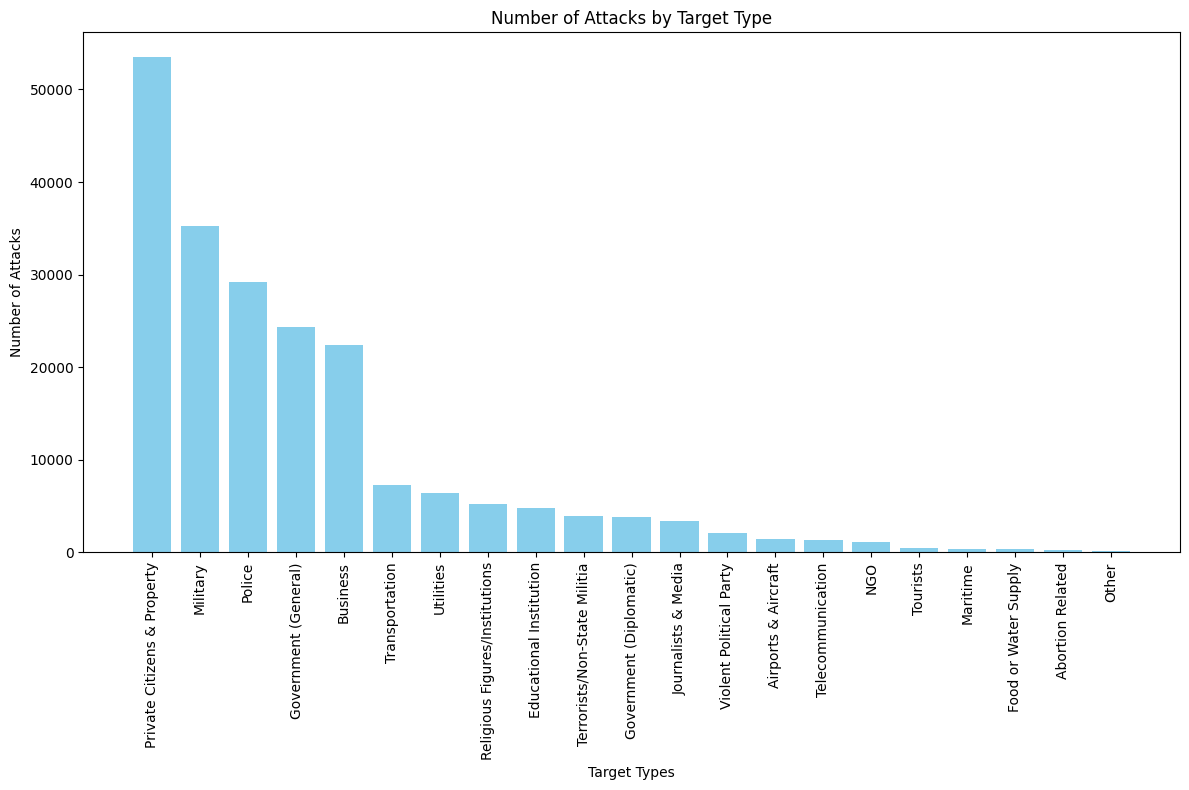

In [86]:

# Get unique target types
target_types = combined_data['targtype1_txt'].unique()

# Create an empty dictionary to store attack counts for each target type
target_attacks_count = {}

# Count attacks for each target type
for target in target_types:
    target_attacks_count[target] = combined_data[combined_data['targtype1_txt'] == target].shape[0]

# Remove 'Unknown' if present
if 'Unknown' in target_attacks_count:
    target_attacks_count.pop('Unknown')

# Sorting the dictionary by attack counts
sorted_targets = dict(sorted(target_attacks_count.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(sorted_targets.keys(), sorted_targets.values(), color='skyblue')
plt.xlabel('Target Types')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Target Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Attacks by Religious Groups vs Unaffiliated vs Random Violence


#### War overlap with terrorist attacks (Matplotlib animation)


#### Killings over 1000, attacks + Reasoning, Actions taken


#### Suicide Attacks


In [87]:
suicide_attacks = combined_data[combined_data['attacktype1_txt'] == 'Suicide (Bombing)']

# Display the count of suicide attacks
print(f"Total number of suicide attacks: {suicide_attacks.shape[0]}")

Total number of suicide attacks: 0
